In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os 

In [2]:
data=np.load('data-memory-save.npy')
target=np.load('target-memory-save.npy')

print(data.shape)
print(target.shape)

(24946, 50, 50, 1)
(24946, 2)


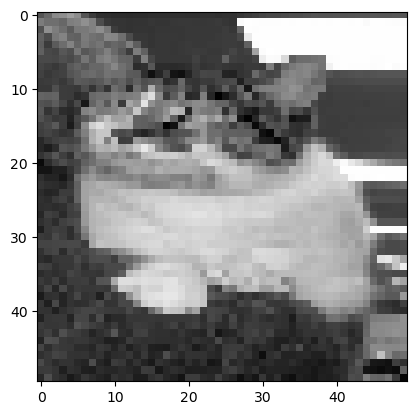

In [3]:
plt.imshow(data[2000],cmap='gray')

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(50,50,1)))
#model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 activation_1 (Activation)   (None, 22, 22, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                    

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
history = model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10,batch_size=64)

Epoch 1/10
351/351 [==============================] - 58s 146ms/step - loss: 0.6732 - accuracy: 0.5675 - val_loss: 0.6043 - val_accuracy: 0.6934
Epoch 2/10
351/351 [==============================] - 47s 135ms/step - loss: 0.6070 - accuracy: 0.6722 - val_loss: 0.5648 - val_accuracy: 0.7190
Epoch 3/10
351/351 [==============================] - 33s 93ms/step - loss: 0.5616 - accuracy: 0.7131 - val_loss: 0.5358 - val_accuracy: 0.7375
Epoch 4/10
351/351 [==============================] - 30s 87ms/step - loss: 0.5453 - accuracy: 0.7219 - val_loss: 0.5200 - val_accuracy: 0.7559
Epoch 5/10
351/351 [==============================] - 32s 90ms/step - loss: 0.5268 - accuracy: 0.7408 - val_loss: 0.5086 - val_accuracy: 0.7587
Epoch 6/10
351/351 [==============================] - 37s 105ms/step - loss: 0.5130 - accuracy: 0.7483 - val_loss: 0.5301 - val_accuracy: 0.7387
Epoch 7/10
351/351 [==============================] - 34s 96ms/step - loss: 0.4975 - accuracy: 0.7555 - val_loss: 0.4861 - val_accura

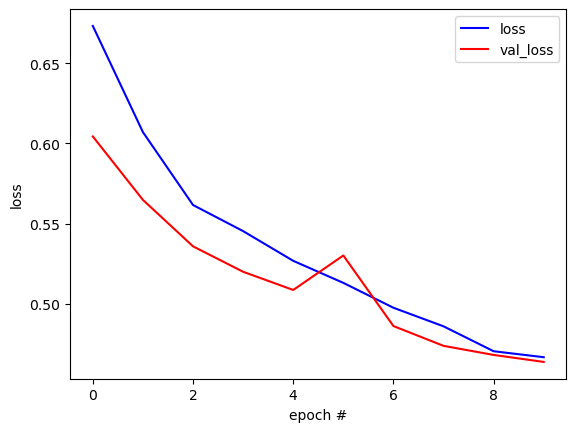

In [7]:
plt.plot(model.history.history['loss'],'b',label='loss')
plt.plot(model.history.history['val_loss'],'r',label='val_loss')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

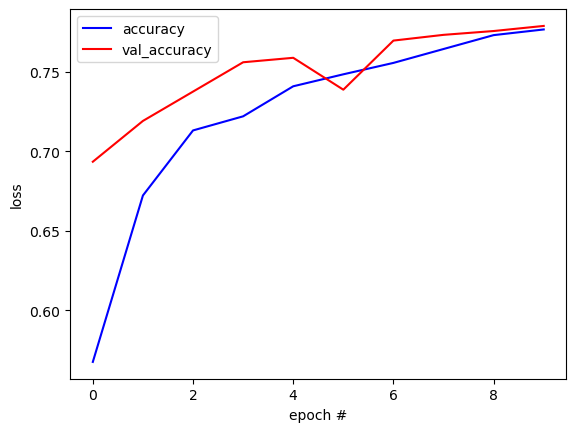

In [8]:
plt.plot(model.history.history['accuracy'],'b',label='accuracy')
plt.plot(model.history.history['val_accuracy'],'r',label='val_accuracy')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

In [9]:
predicted_target=model.predict(test_data)

test_labels=np.argmax(test_target,axis=1)

validation_labels=np.argmax(predicted_target,axis=1)

78/78 [==============================] - 1s 12ms/step


In [10]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(test_labels, validation_labels)))
print()
print("Classification Report:")
print(classification_report(test_labels, validation_labels,target_names=['Cat', 'Dog']))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(test_labels, validation_labels)))

The accuracy score of Random Forest Classifier is 0.7787575150300601

Classification Report:
              precision    recall  f1-score   support

         Cat       0.79      0.76      0.78      1252
         Dog       0.77      0.80      0.78      1243

    accuracy                           0.78      2495
   macro avg       0.78      0.78      0.78      2495
weighted avg       0.78      0.78      0.78      2495


The AUC-ROC score is 0.7788269259932299


In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(test_labels,validation_labels)
print(matrix)

[[951 301]
 [251 992]]


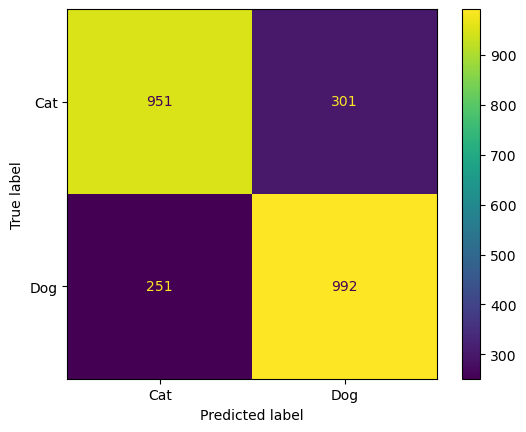

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Cat', 'Dog'])
disp.plot()